## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

In [ ]:
## Let start with importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
## now we Download our Data set
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
ps_df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Capston Project/Capstone Project - Exploratory Data Analysis (EDA)/Play Store Data.csv')

In [ ]:
## Lets see at some insights of data
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
#Change the data where value is na with the mode values of the column
Rating_Mode = ps_df['Rating'].mode().values[0]
Type_Mode = ps_df['Type'].mode().values[0]
Content_Rating_Mode = ps_df['Content Rating'].mode().values[0]


ps_df[ps_df['Rating'].isna()] = Rating_Mode
ps_df[ps_df['Type'].isna()] = Type_Mode
ps_df[ps_df['Content Rating'].isna()] = Content_Rating_Mode

In [ ]:
#There are some rows which have same data in every column hence we are dropping those rows
Data_to_drop = ps_df[ps_df['App'] == ps_df['Rating']]
ps_df.drop(Data_to_drop.index[:],axis=0,inplace=True)

In [ ]:
#Changing the columns in their respective datatypes with proper format and Remove 4453 the default row
try:
  ps_df.rename({'Price':'Price (in $)'},inplace=True,axis=1)

  ps_df['Reviews']=ps_df['Reviews'].replace('4.1 and up',0).replace('Everyone',0).astype(int)

  ps_df['Rating'] = ps_df['Rating'].replace('4.1 and up',ps_df['Rating'].mean()).replace('Everyone',ps_df['Rating'].mean()).astype(float)

  ps_df['Installs']=ps_df['Installs'].apply(lambda x : int(x[0:(len(x)-1)].replace(',','')))

  ps_df['Price (in $)'] = ps_df['Price (in $)'].replace('4.1 and up',0).replace('Everyone',0).apply(lambda x: float(x.replace('$','')))

  ps_df['Last Update Year'] = pd.DatetimeIndex(pd.to_datetime(ps_df['Last Updated'].apply(lambda x : x[-4:]),format='%Y')).year
  
except:
  print('Float Value Problem')


In [ ]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9366 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   App               9366 non-null   object 
 1   Category          9366 non-null   object 
 2   Rating            9366 non-null   float64
 3   Reviews           9366 non-null   int64  
 4   Size              9366 non-null   object 
 5   Installs          9366 non-null   int64  
 6   Type              9366 non-null   object 
 7   Price (in $)      9366 non-null   float64
 8   Content Rating    9366 non-null   object 
 9   Genres            9366 non-null   object 
 10  Last Updated      9366 non-null   object 
 11  Current Ver       9362 non-null   object 
 12  Android Ver       9364 non-null   object 
 13  Last Update Year  9366 non-null   int64  
dtypes: float64(2), int64(3), object(9)
memory usage: 1.1+ MB


### Q1: Top 5 free Gaming and ART_AND_DESIGN Applications , Those are having high ratings.

In [ ]:
a = ps_df[ps_df['Category']== 'GAME']
top_free_gaming = a[a['Type']== 'Free'].sort_values('Rating', ascending=False)
top_free_gaming.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Update Year
10776,Monster Ride Pro,GAME,5.0,1,24M,10,Free,0.0,Everyone,Racing,"March 5, 2018",2.0,2.3 and up,2018
10721,Mad Dash Fo' Cash,GAME,5.0,14,16M,100,Free,0.0,Everyone,Arcade,"June 19, 2017",2.5a,4.1 and up,2017
7698,CP Trivia,GAME,5.0,5,12M,100,Free,0.0,Everyone,Trivia,"August 6, 2018",0.99,5.0 and up,2018
7402,Trovami se ci riesci,GAME,5.0,11,6.1M,10,Free,0.0,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up,2017
9265,EC Mover,GAME,5.0,5,4.6M,10,Free,0.0,Everyone,Racing,"August 1, 2018",1.11,4.0.3 and up,2018


In [ ]:
a = ps_df[ps_df['Category']== 'ART_AND_DESIGN']
top_free_gaming = a[a['Type']== 'Free'].sort_values('Rating', ascending=False)
top_free_gaming.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Update Year
8888,Spring flowers theme couleurs d t space,ART_AND_DESIGN,5.0,1,2.9M,100,Free,0.0,Everyone,Art & Design,"April 18, 2018",1.0.2,4.0 and up,2018
25,Harley Quinn wallpapers HD,ART_AND_DESIGN,4.8,192,6.0M,10000,Free,0.0,Everyone,Art & Design,"April 25, 2018",1.5,3.0 and up,2018
5254,AJ Styles HD Wallpapers,ART_AND_DESIGN,4.8,48,25M,5000,Free,0.0,Everyone,Art & Design,"August 4, 2018",1.1.1,4.1 and up,2018
6930,Fantasy theme dark bw black building,ART_AND_DESIGN,4.8,41,1.9M,5000,Free,0.0,Everyone,Art & Design,"March 20, 2018",1.0.2,4.0 and up,2018
3982,Cardi B Wallpaper,ART_AND_DESIGN,4.8,253,3.7M,50000,Free,0.0,Everyone,Art & Design,"November 1, 2017",1.0.0,4.0 and up,2017


### Q2: find maximum Installs applications and provide it's 5 best Review.

In [ ]:
max_installs = ps_df.sort_values('Installs', ascending=False)
max_installs.head(5)

,App,Category,Rating,Reviews,Size,Installs,Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Update Year
3816,Google News,NEWS_AND_MAGAZINES,3.9,877643,13M,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up,2018
3996,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642112,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 1, 2018",Varies with device,Varies with device,2018
451,Gmail,COMMUNICATION,4.3,4604483,Varies with device,1000000000,Free,0.0,Everyone,Communication,"August 2, 2018",Varies with device,Varies with device,2018
3117,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,Varies with device,1000000000,Free,0.0,Everyone,Travel & Local,"July 31, 2018",Varies with device,Varies with device,2018
9844,Google News,NEWS_AND_MAGAZINES,3.9,878065,13M,1000000000,Free,0.0,Teen,News & Magazines,"August 1, 2018",5.2.0,4.4 and up,2018


In [ ]:
# Drop some column from Dataset and find best install app based on their category, review and rating.
ps_df_max_col= max_installs.drop(['Size', 'Type', 'Price (in $)', 'Content Rating', 'Genres','Current Ver', 'Android Ver','Last Update Year','Last Updated'],axis=1).head().reset_index(drop=True)
ps_df_max_col

,App,Category,Rating,Reviews,Installs
0,Google News,NEWS_AND_MAGAZINES,3.9,877643,1000000000
1,Google Chrome: Fast & Secure,COMMUNICATION,4.3,9642112,1000000000
2,Gmail,COMMUNICATION,4.3,4604483,1000000000
3,Maps - Navigate & Explore,TRAVEL_AND_LOCAL,4.3,9235155,1000000000
4,Google News,NEWS_AND_MAGAZINES,3.9,878065,1000000000


# Q3: Number of Paid and Free Application with Graph.

In [ ]:
pf=ps_df.groupby(["Type"])["Type"].count()
pf

Type
Free    8719
Paid     647
Name: Type, dtype: int64

Text(0.5, 0, 'Type')

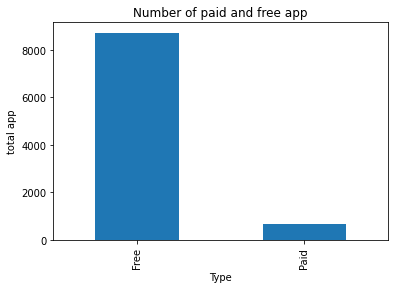

In [ ]:
pf.plot(kind = 'bar')
plt.title('Number of paid and free app')
plt.ylabel('total app')
plt.xlabel('Type')

### Q4: Free Application that have least rating and also provide its category.

In [ ]:
free_app = ps_df.sort_values('Rating', ascending=True)
free_app.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price (in $),Content Rating,Genres,Last Updated,Current Ver,Android Ver,Last Update Year
8820,DS Creator 2.0,TOOLS,1.0,2,4.4M,500,Free,0.0,Everyone,Tools,"March 23, 2018",2.0.180226.1,4.0 and up,2018
7144,CB Mobile Biz,FINANCE,1.0,3,8.4M,500,Free,0.0,Everyone,Finance,"February 22, 2016",4.4.1255,4.0 and up,2016
10400,Familial Hypercholesterolaemia Handbook,MEDICAL,1.0,2,33M,100,Free,0.0,Everyone,Medical,"July 2, 2018",2.0.1,4.1 and up,2018
10591,Lottery Ticket Checker - Florida Results & Lotto,TOOLS,1.0,3,41M,500,Free,0.0,Everyone,Tools,"December 12, 2017",1.0,4.2 and up,2017
5151,Clarksburg AH,MEDICAL,1.0,1,28M,50,Free,0.0,Everyone,Medical,"May 1, 2017",300000.0.81,4.0.3 and up,2017


In [ ]:

free_app[['App','Category','Rating']].head(1)

,App,Category,Rating
8820,DS Creator 2.0,TOOLS,1.0
